### This notebook contains the code for analyzing the 218 different combinations of at least three landmarks. 

In [33]:
# import necessary modules
import pickle

import pandas as pd
import numpy as np
from statistics import mean
from itertools import combinations as combos

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
style.use('fivethirtyeight')


In [2]:
# bring in the dictionary with the fragments' landmarks
infile = open("fragments_dictionary.pickle",'rb')
display_dict = pickle.load(infile)
infile.close()

#### Loop through each csv file and perform analysis

In [3]:
LDA = LinearDiscriminantAnalysis(n_components=1)

frag_scores = {}
frag_trainScores = {}
frag_testScores = {}

for i in range(1, 219):
    #Load original procrustes transformed coordinates
    df1 = pd.read_csv("frag_{}.csv".format(str(i)))

    #Split data so last five observations are left out of model fitting
    df2 = df1.iloc[:-5]
    x1 = df2[display_dict["frag_{}".format(str(i))]].values

    #Bring in target variable and split that one as well
    gender = pd.read_csv('Id_Gender.csv')
    target = gender['Gender'].values
    gender1 = gender.iloc[:-5]
    target1 = gender1['Gender'].values

    #Gather last five observations and store for later testing
    tester = df1.iloc[-5:]
    x1_tester = tester[display_dict["frag_{}".format(str(i))]].values
    #print(x1_tester)

    g_test = gender.iloc[-5:]
    tester_target = g_test['Gender'].values
    #print(tester_target)
    #print(target)

    x1_train, x1_test, y1_train, y1_test = train_test_split(x1, target1, test_size=0.3, random_state=0)
    
    
    x1_lda = LDA.fit_transform(x1_train, y1_train)

    #print(x1_lda)

    scores = []
    x1_test_lda = LDA.transform(x1_test)
    lda1_train_score = LDA.score(x1_train, y1_train)
    lda1_test_score = LDA.score(x1_test, y1_test)
    full1_score = LDA.score(x1, target1)
    scores.append(lda1_train_score)
    scores.append(lda1_test_score)
    #print("The training score for frag_{} is:".format(str(i)))
    #print(lda1_train_score)
    #print("The testing score for frag_{} is:".format(str(i)))
    #print(lda1_test_score)
    #print(full1_score)
    frag_scores["frag_{}".format(str(i))] = scores
    frag_trainScores["frag_{}".format(str(i))] = lda1_train_score
    frag_testScores["frag_{}".format(str(i))] = lda1_test_score

    #print(x1_train)

    x1_tester_lda = LDA.transform(x1_tester)
    tester_prediction = LDA.predict(x1_tester)
    #print("The predicted classification of the testers for frag_{} are:".format(str(i)))
    #print(tester_prediction)

The training score for frag_1 is:
0.9195402298850575
The testing score for frag_1 is:
0.875
The predicted classification of the testers for frag_1 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_2 is:
0.8697318007662835
The testing score for frag_2 is:
0.7946428571428571
The predicted classification of the testers for frag_2 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_3 is:
0.8352490421455939
The testing score for frag_3 is:
0.8482142857142857
The predicted classification of the testers for frag_3 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_4 is:
0.842911877394636
The testing score for frag_4 is:
0.8660714285714286
The predicted classification of the testers for frag_4 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_5 is:
0.842911877394636
The testing score for frag_5 is:
0.8303571428571429
The predicted classification of the testers for frag_5 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_6 is:
0.8697318007662835
The testing score for frag_

The training score for frag_48 is:
0.8888888888888888
The testing score for frag_48 is:
0.8482142857142857
The predicted classification of the testers for frag_48 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_49 is:
0.89272030651341
The testing score for frag_49 is:
0.8392857142857143
The predicted classification of the testers for frag_49 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_50 is:
0.9042145593869731
The testing score for frag_50 is:
0.8660714285714286
The predicted classification of the testers for frag_50 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_51 is:
0.9272030651340997
The testing score for frag_51 is:
0.9107142857142857
The predicted classification of the testers for frag_51 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_52 is:
0.8850574712643678
The testing score for frag_52 is:
0.8839285714285714
The predicted classification of the testers for frag_52 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_53 is:
0.888888888888888

The predicted classification of the testers for frag_95 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_96 is:
0.9540229885057471
The testing score for frag_96 is:
0.9553571428571429
The predicted classification of the testers for frag_96 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_97 is:
0.946360153256705
The testing score for frag_97 is:
0.9107142857142857
The predicted classification of the testers for frag_97 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_98 is:
0.9348659003831418
The testing score for frag_98 is:
0.8839285714285714
The predicted classification of the testers for frag_98 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_99 is:
0.9578544061302682
The testing score for frag_99 is:
0.9464285714285714
The predicted classification of the testers for frag_99 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_100 is:
0.9578544061302682
The testing score for frag_100 is:
0.9375
The predicted classification of the testers for frag_100 are:

The predicted classification of the testers for frag_146 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_147 is:
0.9578544061302682
The testing score for frag_147 is:
0.9285714285714286
The predicted classification of the testers for frag_147 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_148 is:
0.946360153256705
The testing score for frag_148 is:
0.9375
The predicted classification of the testers for frag_148 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_149 is:
0.9616858237547893
The testing score for frag_149 is:
0.9375
The predicted classification of the testers for frag_149 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_150 is:
0.9655172413793104
The testing score for frag_150 is:
0.9375
The predicted classification of the testers for frag_150 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_151 is:
0.9578544061302682
The testing score for frag_151 is:
0.9196428571428571
The predicted classification of the testers for frag_151 are:
['M' 'F' '

C:\Users\brandon.bridge\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\brandon.bridge\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\brandon.bridge\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\brandon.bridge\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\brandon.bridge\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\brandon.bridge\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.w

The training score for frag_183 is:
0.9616858237547893
The testing score for frag_183 is:
0.9464285714285714
The predicted classification of the testers for frag_183 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_184 is:
0.9616858237547893
The testing score for frag_184 is:
0.9464285714285714
The predicted classification of the testers for frag_184 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_185 is:
0.9616858237547893
The testing score for frag_185 is:
0.9464285714285714
The predicted classification of the testers for frag_185 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_186 is:
0.9616858237547893
The testing score for frag_186 is:
0.9464285714285714
The predicted classification of the testers for frag_186 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_187 is:
0.9616858237547893
The testing score for frag_187 is:
0.9464285714285714
The predicted classification of the testers for frag_187 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_188 is:

C:\Users\brandon.bridge\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\brandon.bridge\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\brandon.bridge\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\brandon.bridge\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\brandon.bridge\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\brandon.bridge\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.w

The training score for frag_191 is:
0.9616858237547893
The testing score for frag_191 is:
0.9464285714285714
The predicted classification of the testers for frag_191 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_192 is:
0.9616858237547893
The testing score for frag_192 is:
0.9464285714285714
The predicted classification of the testers for frag_192 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_193 is:
0.9616858237547893
The testing score for frag_193 is:
0.9464285714285714
The predicted classification of the testers for frag_193 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_194 is:
0.9616858237547893
The testing score for frag_194 is:
0.9464285714285714
The predicted classification of the testers for frag_194 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_195 is:
0.9616858237547893
The testing score for frag_195 is:
0.9464285714285714
The predicted classification of the testers for frag_195 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_196 is:

C:\Users\brandon.bridge\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\brandon.bridge\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\brandon.bridge\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\brandon.bridge\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\brandon.bridge\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\brandon.bridge\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.w

The training score for frag_208 is:
0.9616858237547893
The testing score for frag_208 is:
0.9464285714285714
The predicted classification of the testers for frag_208 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_209 is:
0.9616858237547893
The testing score for frag_209 is:
0.9464285714285714
The predicted classification of the testers for frag_209 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_210 is:
0.9616858237547893
The testing score for frag_210 is:
0.9464285714285714
The predicted classification of the testers for frag_210 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_211 is:
0.9616858237547893
The testing score for frag_211 is:
0.9464285714285714
The predicted classification of the testers for frag_211 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_212 is:
0.9616858237547893
The testing score for frag_212 is:
0.9464285714285714
The predicted classification of the testers for frag_212 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_213 is:

C:\Users\brandon.bridge\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\brandon.bridge\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\brandon.bridge\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\brandon.bridge\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\brandon.bridge\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\brandon.bridge\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.w

The training score for frag_216 is:
0.9616858237547893
The testing score for frag_216 is:
0.9464285714285714
The predicted classification of the testers for frag_216 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_217 is:
0.9616858237547893
The testing score for frag_217 is:
0.9464285714285714
The predicted classification of the testers for frag_217 are:
['M' 'F' 'F' 'F' 'F']
The training score for frag_218 is:
0.9616858237547893
The testing score for frag_218 is:
0.9464285714285714
The predicted classification of the testers for frag_218 are:
['M' 'F' 'F' 'F' 'F']


C:\Users\brandon.bridge\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\brandon.bridge\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [4]:
print(frag_testScores)

{'frag_1': 0.875, 'frag_2': 0.7946428571428571, 'frag_3': 0.8482142857142857, 'frag_4': 0.8660714285714286, 'frag_5': 0.8303571428571429, 'frag_6': 0.8214285714285714, 'frag_7': 0.875, 'frag_8': 0.8571428571428571, 'frag_9': 0.9375, 'frag_10': 0.8928571428571429, 'frag_11': 0.8839285714285714, 'frag_12': 0.7946428571428571, 'frag_13': 0.8392857142857143, 'frag_14': 0.8214285714285714, 'frag_15': 0.7767857142857143, 'frag_16': 0.875, 'frag_17': 0.875, 'frag_18': 0.8571428571428571, 'frag_19': 0.8571428571428571, 'frag_20': 0.8839285714285714, 'frag_21': 0.8660714285714286, 'frag_22': 0.8839285714285714, 'frag_23': 0.875, 'frag_24': 0.9553571428571429, 'frag_25': 0.9017857142857143, 'frag_26': 0.8928571428571429, 'frag_27': 0.8214285714285714, 'frag_28': 0.875, 'frag_29': 0.8035714285714286, 'frag_30': 0.8392857142857143, 'frag_31': 0.8660714285714286, 'frag_32': 0.8482142857142857, 'frag_33': 0.8303571428571429, 'frag_34': 0.8482142857142857, 'frag_35': 0.875, 'frag_36': 0.8214285714285

In [10]:
test_scores_for_csv = pd.DataFrame.from_dict(frag_testScores, orient='index')
print(test_scores_for_csv)
test_scores_for_csv.to_csv("test_scores.csv")

                 0
frag_1    0.875000
frag_2    0.794643
frag_3    0.848214
frag_4    0.866071
frag_5    0.830357
...            ...
frag_214  0.946429
frag_215  0.946429
frag_216  0.946429
frag_217  0.946429
frag_218  0.946429

[218 rows x 1 columns]


In [12]:
train_scores_for_csv = pd.DataFrame.from_dict(frag_trainScores, orient='index')
print(train_scores_for_csv)
train_scores_for_csv.to_csv("train_scores.csv")

                 0
frag_1    0.919540
frag_2    0.869732
frag_3    0.835249
frag_4    0.842912
frag_5    0.842912
...            ...
frag_214  0.961686
frag_215  0.961686
frag_216  0.961686
frag_217  0.961686
frag_218  0.961686

[218 rows x 1 columns]


In [6]:
sorted_test_scores = sorted(frag_testScores.items(), key=lambda x: x[1])
print(sorted_test_scores)

[('frag_15', 0.7767857142857143), ('frag_2', 0.7946428571428571), ('frag_12', 0.7946428571428571), ('frag_29', 0.8035714285714286), ('frag_64', 0.8125), ('frag_6', 0.8214285714285714), ('frag_14', 0.8214285714285714), ('frag_27', 0.8214285714285714), ('frag_36', 0.8214285714285714), ('frag_62', 0.8214285714285714), ('frag_83', 0.8214285714285714), ('frag_5', 0.8303571428571429), ('frag_33', 0.8303571428571429), ('frag_65', 0.8303571428571429), ('frag_13', 0.8392857142857143), ('frag_30', 0.8392857142857143), ('frag_49', 0.8392857142857143), ('frag_3', 0.8482142857142857), ('frag_32', 0.8482142857142857), ('frag_34', 0.8482142857142857), ('frag_48', 0.8482142857142857), ('frag_55', 0.8482142857142857), ('frag_82', 0.8482142857142857), ('frag_90', 0.8482142857142857), ('frag_104', 0.8482142857142857), ('frag_110', 0.8482142857142857), ('frag_8', 0.8571428571428571), ('frag_18', 0.8571428571428571), ('frag_19', 0.8571428571428571), ('frag_54', 0.8571428571428571), ('frag_63', 0.8571428571

In [8]:
df = pd.DataFrame(sorted_test_scores, columns = ['Fragment Number', 'Test Score'])
print(df)
df.to_csv("test_scores.csv", index=False)

    Fragment Number  Test Score
0           frag_15    0.776786
1            frag_2    0.794643
2           frag_12    0.794643
3           frag_29    0.803571
4           frag_64    0.812500
..              ...         ...
213        frag_115    0.955357
214        frag_121    0.955357
215        frag_172    0.955357
216        frag_177    0.955357
217        frag_181    0.955357

[218 rows x 2 columns]


### Heat Map Construction

In [5]:
# create list of landmarks to search for in fragments
lmks = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
combos_2 = [x for x in combos(lmks, 2)]

#verify
print(combos_2)

[('x1', 'x2'), ('x1', 'x3'), ('x1', 'x4'), ('x1', 'x5'), ('x1', 'x6'), ('x1', 'x7'), ('x1', 'x8'), ('x2', 'x3'), ('x2', 'x4'), ('x2', 'x5'), ('x2', 'x6'), ('x2', 'x7'), ('x2', 'x8'), ('x3', 'x4'), ('x3', 'x5'), ('x3', 'x6'), ('x3', 'x7'), ('x3', 'x8'), ('x4', 'x5'), ('x4', 'x6'), ('x4', 'x7'), ('x4', 'x8'), ('x5', 'x6'), ('x5', 'x7'), ('x5', 'x8'), ('x6', 'x7'), ('x6', 'x8'), ('x7', 'x8')]


In [6]:
#testing for output
#print(combos_2[2][1])
#print(combos_2[2])
#print(len(combos_2))

x4
('x1', 'x4')
28


In [7]:
heatmapdict = {}
cnum = 0
for i in range(0, 28):
    heatmapdict["heatmap{}".format(cnum + 1)] = combos_2[cnum]
    cnum += 1
    
print(heatmapdict)

{'heatmap1': ('x1', 'x2'), 'heatmap2': ('x1', 'x3'), 'heatmap3': ('x1', 'x4'), 'heatmap4': ('x1', 'x5'), 'heatmap5': ('x1', 'x6'), 'heatmap6': ('x1', 'x7'), 'heatmap7': ('x1', 'x8'), 'heatmap8': ('x2', 'x3'), 'heatmap9': ('x2', 'x4'), 'heatmap10': ('x2', 'x5'), 'heatmap11': ('x2', 'x6'), 'heatmap12': ('x2', 'x7'), 'heatmap13': ('x2', 'x8'), 'heatmap14': ('x3', 'x4'), 'heatmap15': ('x3', 'x5'), 'heatmap16': ('x3', 'x6'), 'heatmap17': ('x3', 'x7'), 'heatmap18': ('x3', 'x8'), 'heatmap19': ('x4', 'x5'), 'heatmap20': ('x4', 'x6'), 'heatmap21': ('x4', 'x7'), 'heatmap22': ('x4', 'x8'), 'heatmap23': ('x5', 'x6'), 'heatmap24': ('x5', 'x7'), 'heatmap25': ('x5', 'x8'), 'heatmap26': ('x6', 'x7'), 'heatmap27': ('x6', 'x8'), 'heatmap28': ('x7', 'x8')}


In [8]:
#build dictionary with keys as 1-28 combos and values as lists of fragments containing said combo
combo_dict = {}
combo_num = 0
for combi in combos_2:
    combo_num += 1
    frag_list = []
    for key, val in display_dict.items():
        if combi[0] in val and combi[1] in val:
            frag_list.append(key)
    combo_dict["combo_num{}".format(str(combo_num))] = frag_list
    

print(combo_dict)


{'combo_num1': ['frag_1', 'frag_2', 'frag_3', 'frag_4', 'frag_5', 'frag_6', 'frag_57', 'frag_58', 'frag_59', 'frag_60', 'frag_61', 'frag_62', 'frag_63', 'frag_64', 'frag_65', 'frag_66', 'frag_67', 'frag_68', 'frag_69', 'frag_70', 'frag_71', 'frag_127', 'frag_128', 'frag_129', 'frag_130', 'frag_131', 'frag_132', 'frag_133', 'frag_134', 'frag_135', 'frag_136', 'frag_137', 'frag_138', 'frag_139', 'frag_140', 'frag_141', 'frag_142', 'frag_143', 'frag_144', 'frag_145', 'frag_146', 'frag_183', 'frag_184', 'frag_185', 'frag_186', 'frag_187', 'frag_188', 'frag_189', 'frag_190', 'frag_191', 'frag_192', 'frag_193', 'frag_194', 'frag_195', 'frag_196', 'frag_197', 'frag_211', 'frag_212', 'frag_213', 'frag_214', 'frag_215', 'frag_216'], 'combo_num2': ['frag_1', 'frag_7', 'frag_8', 'frag_9', 'frag_10', 'frag_11', 'frag_57', 'frag_58', 'frag_59', 'frag_60', 'frag_61', 'frag_72', 'frag_73', 'frag_74', 'frag_75', 'frag_76', 'frag_77', 'frag_78', 'frag_79', 'frag_80', 'frag_81', 'frag_127', 'frag_128', 

In [9]:
#test output
print(combo_dict['combo_num1'])
#this output matches the output below for one combo "print(frag_list_1_2)"

['frag_1', 'frag_2', 'frag_3', 'frag_4', 'frag_5', 'frag_6', 'frag_57', 'frag_58', 'frag_59', 'frag_60', 'frag_61', 'frag_62', 'frag_63', 'frag_64', 'frag_65', 'frag_66', 'frag_67', 'frag_68', 'frag_69', 'frag_70', 'frag_71', 'frag_127', 'frag_128', 'frag_129', 'frag_130', 'frag_131', 'frag_132', 'frag_133', 'frag_134', 'frag_135', 'frag_136', 'frag_137', 'frag_138', 'frag_139', 'frag_140', 'frag_141', 'frag_142', 'frag_143', 'frag_144', 'frag_145', 'frag_146', 'frag_183', 'frag_184', 'frag_185', 'frag_186', 'frag_187', 'frag_188', 'frag_189', 'frag_190', 'frag_191', 'frag_192', 'frag_193', 'frag_194', 'frag_195', 'frag_196', 'frag_197', 'frag_211', 'frag_212', 'frag_213', 'frag_214', 'frag_215', 'frag_216']


In [27]:
#I tried all of this first, the above code was an effort to make the following better
frag_list_1_2 = []
for key, val in display_dict.items():
    if 'x1' in val and 'x2' in val:
        frag_list_1_2.append(key)

print(frag_list_1_2)

['frag_1', 'frag_2', 'frag_3', 'frag_4', 'frag_5', 'frag_6', 'frag_57', 'frag_58', 'frag_59', 'frag_60', 'frag_61', 'frag_62', 'frag_63', 'frag_64', 'frag_65', 'frag_66', 'frag_67', 'frag_68', 'frag_69', 'frag_70', 'frag_71', 'frag_127', 'frag_128', 'frag_129', 'frag_130', 'frag_131', 'frag_132', 'frag_133', 'frag_134', 'frag_135', 'frag_136', 'frag_137', 'frag_138', 'frag_139', 'frag_140', 'frag_141', 'frag_142', 'frag_143', 'frag_144', 'frag_145', 'frag_146', 'frag_183', 'frag_184', 'frag_185', 'frag_186', 'frag_187', 'frag_188', 'frag_189', 'frag_190', 'frag_191', 'frag_192', 'frag_193', 'frag_194', 'frag_195', 'frag_196', 'frag_197', 'frag_211', 'frag_212', 'frag_213', 'frag_214', 'frag_215', 'frag_216']


### Next block was first attempt

In [10]:
"""
for frag in frag_list_1_2:
    score_list_1_2 = [frag_testScores[x] for x in frag_list_1_2]
print(score_list_1_2)

print("The average predictive power of a fragment containing landmarks one and two is:" + "\n" + str(mean(score_list_1_2)))    
"""

NameError: name 'frag_list_1_2' is not defined

#### that attempt was successful, now try a loop


### Next block is the attempt to loop through each

In [11]:
score_list = {}
heatmapscorelist = {}
for i in combo_dict.keys():
    for frag in combo_dict[i]:
        score_list["{}".format(i)] = [frag_testScores[x] for x in combo_dict[i]]
    heatmapscorelist["{}".format(i)] = mean(score_list[i])

print(heatmapscorelist)

{'combo_num1': 0.9091301843317973, 'combo_num2': 0.9277073732718893, 'combo_num3': 0.908266129032258, 'combo_num4': 0.9112903225806451, 'combo_num5': 0.9226670506912442, 'combo_num6': 0.9140264976958525, 'combo_num7': 0.9151785714285714, 'combo_num8': 0.9297235023041475, 'combo_num9': 0.9141705069124424, 'combo_num10': 0.9131624423963134, 'combo_num11': 0.9278513824884792, 'combo_num12': 0.9148905529953917, 'combo_num13': 0.9160426267281105, 'combo_num14': 0.9315956221198156, 'combo_num15': 0.9269873271889401, 'combo_num16': 0.9428283410138248, 'combo_num17': 0.9336117511520737, 'combo_num18': 0.931163594470046, 'combo_num19': 0.9147465437788018, 'combo_num20': 0.9292914746543779, 'combo_num21': 0.9182027649769585, 'combo_num22': 0.9243951612903225, 'combo_num23': 0.9268433179723502, 'combo_num24': 0.9170506912442397, 'combo_num25': 0.914602534562212, 'combo_num26': 0.9288594470046083, 'combo_num27': 0.9288594470046083, 'combo_num28': 0.9199308755760368}


#### now look at it sorted

In [12]:
sorted_heat_scores = sorted(heatmapscorelist.items(), key=lambda x: x[1])
print(sorted_heat_scores)

[('combo_num3', 0.908266129032258), ('combo_num1', 0.9091301843317973), ('combo_num4', 0.9112903225806451), ('combo_num10', 0.9131624423963134), ('combo_num6', 0.9140264976958525), ('combo_num9', 0.9141705069124424), ('combo_num25', 0.914602534562212), ('combo_num19', 0.9147465437788018), ('combo_num12', 0.9148905529953917), ('combo_num7', 0.9151785714285714), ('combo_num13', 0.9160426267281105), ('combo_num24', 0.9170506912442397), ('combo_num21', 0.9182027649769585), ('combo_num28', 0.9199308755760368), ('combo_num5', 0.9226670506912442), ('combo_num22', 0.9243951612903225), ('combo_num23', 0.9268433179723502), ('combo_num15', 0.9269873271889401), ('combo_num2', 0.9277073732718893), ('combo_num11', 0.9278513824884792), ('combo_num26', 0.9288594470046083), ('combo_num27', 0.9288594470046083), ('combo_num20', 0.9292914746543779), ('combo_num8', 0.9297235023041475), ('combo_num18', 0.931163594470046), ('combo_num14', 0.9315956221198156), ('combo_num17', 0.9336117511520737), ('combo_num1

#### so combo_num3 (lmks one and four) is the least powerful while combo_num16 (lmks three and six) is the most powerfully predictive

In [13]:
df = pd.DataFrame.from_dict(heatmapscorelist, orient='index')
print(df)
df.to_csv('heatscores.csv')

                    0
combo_num1   0.909130
combo_num2   0.927707
combo_num3   0.908266
combo_num4   0.911290
combo_num5   0.922667
combo_num6   0.914026
combo_num7   0.915179
combo_num8   0.929724
combo_num9   0.914171
combo_num10  0.913162
combo_num11  0.927851
combo_num12  0.914891
combo_num13  0.916043
combo_num14  0.931596
combo_num15  0.926987
combo_num16  0.942828
combo_num17  0.933612
combo_num18  0.931164
combo_num19  0.914747
combo_num20  0.929291
combo_num21  0.918203
combo_num22  0.924395
combo_num23  0.926843
combo_num24  0.917051
combo_num25  0.914603
combo_num26  0.928859
combo_num27  0.928859
combo_num28  0.919931


In [29]:
hmdf = pd.read_csv('heatmap.csv', index_col=0)
print(hmdf)


           1        2         3         4         5         6         7  \
landmark                                                                  
1        NaN  0.90913  0.927707  0.908266  0.911290  0.922667  0.914026   
2        NaN      NaN  0.929724  0.914171  0.913162  0.927851  0.914891   
3        NaN      NaN       NaN  0.931596  0.926987  0.942828  0.933612   
4        NaN      NaN       NaN       NaN  0.914747  0.929291  0.918203   
5        NaN      NaN       NaN       NaN       NaN  0.926843  0.917051   
6        NaN      NaN       NaN       NaN       NaN       NaN  0.928859   
7        NaN      NaN       NaN       NaN       NaN       NaN       NaN   
8        NaN      NaN       NaN       NaN       NaN       NaN       NaN   

                 8  
landmark            
1         0.915179  
2         0.916043  
3         0.931164  
4         0.924395  
5         0.914603  
6         0.928859  
7         0.919931  
8              NaN  


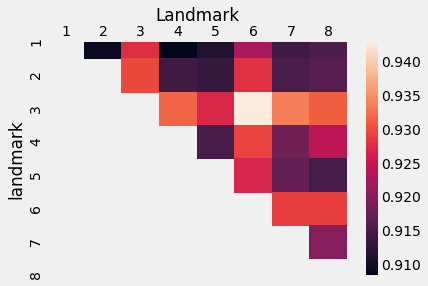

<Figure size 432x288 with 0 Axes>

In [54]:
p1 = sns.heatmap(hmdf) #add ', annot=True' for labeling each cell
p1.xaxis.set_ticks_position('top')
p1.set_xlabel('Landmark')
p1.xaxis.set_label_position('top')
plt.show()
plt.savefig('hmap.png')

#### don't like it, transpose and use different color scheme

In [43]:
hmdf1 = pd.read_csv('heatmap1.csv', index_col=0)
print(hmdf1)

                 1         2         3         4         5         6  \
Landmark                                                               
1              NaN       NaN       NaN       NaN       NaN       NaN   
2         0.909130       NaN       NaN       NaN       NaN       NaN   
3         0.927707  0.929724       NaN       NaN       NaN       NaN   
4         0.908266  0.914171  0.931596       NaN       NaN       NaN   
5         0.911290  0.913162  0.926987  0.914747       NaN       NaN   
6         0.922667  0.927851  0.942828  0.929291  0.926843       NaN   
7         0.914026  0.914891  0.933612  0.918203  0.917051  0.928859   
8         0.915179  0.916043  0.931164  0.924395  0.914603  0.928859   

                 7   8  
Landmark                
1              NaN NaN  
2              NaN NaN  
3              NaN NaN  
4              NaN NaN  
5              NaN NaN  
6              NaN NaN  
7              NaN NaN  
8         0.919931 NaN  


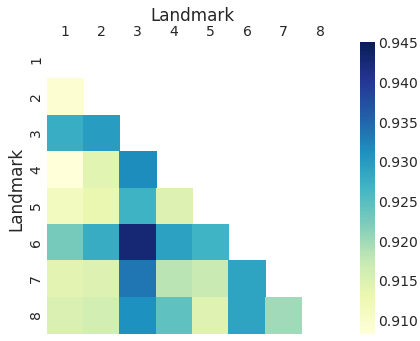

In [52]:
mask = np.zeros_like(hmdf1)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(hmdf1, cmap="YlGnBu", mask=mask, vmax=.945, square=True)
    ax.xaxis.set_ticks_position('top')
    ax.set_xlabel('Landmark')
    ax.set_ylabel('Landmark')
    ax.xaxis.set_label_position('top')

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!


### Save the figure to an image file:


In [53]:
fig = ax.get_figure()
fig.savefig('heatmap69.png')